In [3]:
# The pip installation may be needed ONLY IF importing yfinance does not work
# In which case, do it before executing the import statement below.

# pip install yfinance

import yfinance as yf

In [4]:
import os

import pandas as pd

import numpy as np
import scipy as sci

In [5]:
# get raw data on QTEC, an mutual Fund that tracks the NDXT
# Data in spreadsheet downloaded from First Trust, the manager of QTEC
os.chdir('/Users/yang/Documents/fintech_final_project')
raw_QTEC = pd.read_excel("QTEC-Holdings.xlsx")


print("Size of the dataset (row, col): ", raw_QTEC.shape)
raw_QTEC.head()
 

Size of the dataset (row, col):  (38, 7)


,Security Name,Identifier,CUSIP,Classification,Shares or Quantity,Market Value,Weighting
0,"Palo Alto Networks, Inc.",PANW,697435105,Software,217443,53606222.79,0.0274
1,ON Semiconductor Corporation,ON,682189105,Semiconductors,591558,53328953.70,0.0273
2,PDD Holdings Inc. (ADR),PDD,722304102,Consumer Digital Services,667344,53300765.28,0.0273
3,"Zoom Video Communications, Inc. (Class A)",ZM,98980L101,Software,761939,53381446.34,0.0273
4,"ANSYS, Inc.",ANSS,03662Q105,Software,158930,53141424.10,0.0272


In [6]:
# Get daily open/high/low/closing values for NQMAUS over the past 5 years
NDXT_values = yf.download('^NDXT',start='2018-06-13',end='2023-06-13')

[*********************100%***********************]  1 of 1 completed


In [7]:
NDXT_values

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-13,4411.450195,4438.959961,4390.290039,4398.990234,4398.990234,0
2018-06-14,4412.040039,4441.589844,4412.029785,4429.149902,4429.149902,0
2018-06-15,4400.180176,4419.299805,4375.240234,4418.359863,4418.359863,0
2018-06-18,4372.919922,4409.569824,4356.830078,4404.600098,4404.600098,0
2018-06-19,4334.399902,4369.640137,4310.979980,4368.540039,4368.540039,0
...,...,...,...,...,...,...
2023-06-06,7713.490234,7836.959961,7697.149902,7791.790039,7791.790039,418600
2023-06-07,7827.240234,7846.020020,7616.020020,7633.250000,7633.250000,521500
2023-06-08,7634.879883,7743.229980,7629.419922,7722.799805,7722.799805,405700


In [8]:
# Get NDXT closing values
NDXT_close = NDXT_values[["Close"]]

NDXT_close

,Close
Date,
2018-06-13,4398.990234
2018-06-14,4429.149902
2018-06-15,4418.359863
2018-06-18,4404.600098
2018-06-19,4368.540039
...,...
2023-06-06,7791.790039
2023-06-07,7633.250000
2023-06-08,7722.799805


In [9]:
#  Stocks that form the QTEC 
QTEC_tickers = raw_QTEC['Identifier']

In [10]:
QTEC_tickers

0      PANW
1        ON
2       PDD
3        ZM
4      ANSS
5      TEAM
6      INTC
7      WDAY
8       ADI
9      AMAT
10     CTSH
11      GFS
12     MCHP
13       MU
14     NXPI
15     QCOM
16     AAPL
17     ASML
18     ADSK
19     CDNS
20     FTNT
21     MRVL
22     SNPS
23      AMD
24     AVGO
25     CRWD
26     INTU
27     MSFT
28      TXN
29       ZS
30     ADBE
31     DDOG
32     LRCX
33     KLAC
34     META
35     NVDA
36    GOOGL
37     GOOG
Name: Identifier, dtype: object

In [11]:
# Therefore, the solution below removes such whitespace and prevents the issue 

tickers=[]
for ticker in QTEC_tickers:
    tickers.append(ticker.strip())

In [12]:
# Now, if we check the ticker label for AMGN, we have
tickers[0]

'PANW'

In [13]:
# We can now get all the 5-year price data for the stocks in the 
df_data_download = yf.download(tickers,start='2018-06-13',end='2023-06-13')

[*********************100%***********************]  38 of 38 completed


In [14]:
# Let's get a basic, global idea of the data
df_data_download.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-06-13 to 2023-06-12
Columns: 228 entries, ('Adj Close', 'AAPL') to ('Volume', 'ZS')
dtypes: float64(195), int64(33)
memory usage: 2.2 MB


In [15]:
# Let's now a look more closely
df_data_download

Adj Close                                                  \
                  AAPL        ADBE         ADI        ADSK        AMAT   
Date                                                                     
2018-06-13   45.561821  256.130005   91.830589  137.160004   47.868603   
2018-06-14   45.585716  258.100006   92.421288  138.410004   46.657341   
2018-06-15   45.117435  251.820007   92.239532  137.990005   46.300529   
2018-06-18   45.093536  255.690002   91.866943  141.259995   45.370956   
2018-06-19   44.364830  251.740005   90.930908  141.039993   45.586918   
...                ...         ...         ...         ...         ...   
2023-06-06  179.210007  432.890015  177.970001  208.009995  133.940002   
2023-06-07  177.820007  418.320007  180.369995  201.160004  135.009995   
2023-06-08  180.570007  439.029999  181.679993  200.160004  136.199997   
2023-06-09  180.960007  454.000000  182.460007  201.389999  136.119995   
2023-06-12  183.789993  474.630005  187.660004  208.100006  140.009995   

                                                                        ...  \
                   AMD        ANSS        ASML        AVGO        CDNS  ...   
Date                                                                    ...   
2018-06-13   16.320000  175.789993  203.679062  219.784302   44.580002  ...   
2018-06-14   16.250000  176.919998  205.718246  223.853470   44.939999  ...   
2018-06-15   16.340000  177.779999  204.698654  225.329376   45.020000  ...   
2018-06-18   17.110001  177.919998  201.153931  220.551483   45.180000  ...   
2018-06-19   16.690001  176.759995  196.465744  220.509186   44.919998  ...   
...                ...         ...         ...         ...         ...  ...   
2023-06-06  124.230003  325.589996  716.630005  790.000000  228.779999  ...   
2023-06-07  117.830002  312.850006  710.210022  792.630005  222.470001  ...   
2023-06-08  121.050003  316.049988  720.049988  804.200012  228.080002  ...   
2023-06-09  124.919998  325.529999  715.859985  804.619995  229.300003  ...   
2023-06-12  129.190002  329.970001  730.169983  855.359985  233.220001  ...   

             Volume                                                            \
                 ON     PANW         PDD      QCOM     SNPS     TEAM      TXN   
Date                                                                            
2018-06-13  6352200  7537500         NaN   9676300   709000   791600  4948600   
2018-06-14  5622200  7150200         NaN   8372900   545400   966500  2941200   
2018-06-15  6609000  6566400         NaN  13804900  1362500  1125500  7027600   
2018-06-18  3854900  4340400         NaN   6946600   923400   741400  3170600   
2018-06-19  6590300  2974800         NaN   7958300  1171000  1301400  3486500   
...             ...      ...         ...       ...      ...      ...      ...   
2023-06-06  5217900  5401800  12948300.0   7594500  1152500  2177000  4032400   
2023-06-07  7824700  7175500   9310800.0   7555400  1141900  3090900  4422700   
2023-06-08  4129600  5031600  11429400.0   5793400   799700  2660700  3343700   
2023-06-09  6365000  4969900  13368900.0  13807000   782100  2404000  4179000   
2023-06-12  6527100  5424200   5749400.0   9675100   711100  1943200  4709300   

                                         
               WDAY         ZM       ZS  
Date                                     
2018-06-13  1522500        NaN  1568600  
2018-06-14  2564000        NaN  1952300  
2018-06-15  2070200        NaN  3448000  
2018-06-18  2195400        NaN  1760500  
2018-06-19  1776900        NaN  3160600  
...             ...        ...      ...  
2023-06-06  1404400  3752500.0  3536800  
2023-06-07  2971500  5368900.0  3660600  
2023-06-08  2512800  2889300.0  2849300  
2023-06-09  1884000  4058900.0  2720600  
2023-06-12  1861900  5276200.0  2220000  

[1258 rows x 228 columns]

In [16]:
# Let's remove the columns we do not need
df_data_download = df_data_download.drop(columns=['Open', 'High', 'Low', 'Close','Volume'])

In [17]:
df_data_download 

Adj Close                                                  \
                  AAPL        ADBE         ADI        ADSK        AMAT   
Date                                                                     
2018-06-13   45.561821  256.130005   91.830589  137.160004   47.868603   
2018-06-14   45.585716  258.100006   92.421288  138.410004   46.657341   
2018-06-15   45.117435  251.820007   92.239532  137.990005   46.300529   
2018-06-18   45.093536  255.690002   91.866943  141.259995   45.370956   
2018-06-19   44.364830  251.740005   90.930908  141.039993   45.586918   
...                ...         ...         ...         ...         ...   
2023-06-06  179.210007  432.890015  177.970001  208.009995  133.940002   
2023-06-07  177.820007  418.320007  180.369995  201.160004  135.009995   
2023-06-08  180.570007  439.029999  181.679993  200.160004  136.199997   
2023-06-09  180.960007  454.000000  182.460007  201.389999  136.119995   
2023-06-12  183.789993  474.630005  187.660004  208.100006  140.009995   

                                                                        ...  \
                   AMD        ANSS        ASML        AVGO        CDNS  ...   
Date                                                                    ...   
2018-06-13   16.320000  175.789993  203.679062  219.784302   44.580002  ...   
2018-06-14   16.250000  176.919998  205.718246  223.853470   44.939999  ...   
2018-06-15   16.340000  177.779999  204.698654  225.329376   45.020000  ...   
2018-06-18   17.110001  177.919998  201.153931  220.551483   45.180000  ...   
2018-06-19   16.690001  176.759995  196.465744  220.509186   44.919998  ...   
...                ...         ...         ...         ...         ...  ...   
2023-06-06  124.230003  325.589996  716.630005  790.000000  228.779999  ...   
2023-06-07  117.830002  312.850006  710.210022  792.630005  222.470001  ...   
2023-06-08  121.050003  316.049988  720.049988  804.200012  228.080002  ...   
2023-06-09  124.919998  325.529999  715.859985  804.619995  229.300003  ...   
2023-06-12  129.190002  329.970001  730.169983  855.359985  233.220001  ...   

                                                                      \
                   ON        PANW        PDD        QCOM        SNPS   
Date                                                                   
2018-06-13  25.299999   71.016670        NaN   51.789368   90.470001   
2018-06-14  25.889999   71.853333        NaN   51.999249   90.870003   
2018-06-15  25.610001   71.533333        NaN   52.349052   90.570000   
2018-06-18  25.370001   70.613335        NaN   51.771877   90.480003   
2018-06-19  24.760000   70.323334        NaN   51.334610   89.199997   
...               ...         ...        ...         ...         ...   
2023-06-06  88.480003  224.720001  72.809998  116.360001  443.839996   
2023-06-07  89.239998  216.250000  72.500000  115.180000  435.320007   
2023-06-08  89.989998  222.820007  74.930000  116.349998  437.690002   
2023-06-09  89.019997  220.100006  76.099998  119.110001  438.779999   
2023-06-12  91.059998  229.139999  76.089996  122.139999  446.040009   

                                                                       
                  TEAM         TXN        WDAY         ZM          ZS  
Date                                                                   
2018-06-13   66.139999   99.438553  126.440002        NaN   38.830002  
2018-06-14   66.489998  100.066612  128.199997        NaN   39.389999  
2018-06-15   66.120003  101.087158  128.089996        NaN   41.000000  
2018-06-18   66.610001   99.778748  131.130005        NaN   40.400002  
2018-06-19   65.040001   99.141991  129.559998        NaN   39.160000  
...                ...         ...         ...        ...         ...  
2023-06-06  184.000000  170.360001  215.000000  69.500000  152.990005  
2023-06-07  171.339996  172.000000  203.440002  66.500000  144.919998  
2023-06-08  170.389999  172.229996  204.490005  66.739998  148.82000

In [18]:
# Notice the 'Adj Close' in the column header, making it multiindex, and to keep matters simple and
# helpful, we should eliminate this additional index. To do so, first relabel it so that we can use
# it to redefine a new dataframe
df_data_download.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [19]:
# Let's check the dataframe
df_data_download

adj_close                                                  \
                  AAPL        ADBE         ADI        ADSK        AMAT   
Date                                                                     
2018-06-13   45.561821  256.130005   91.830589  137.160004   47.868603   
2018-06-14   45.585716  258.100006   92.421288  138.410004   46.657341   
2018-06-15   45.117435  251.820007   92.239532  137.990005   46.300529   
2018-06-18   45.093536  255.690002   91.866943  141.259995   45.370956   
2018-06-19   44.364830  251.740005   90.930908  141.039993   45.586918   
...                ...         ...         ...         ...         ...   
2023-06-06  179.210007  432.890015  177.970001  208.009995  133.940002   
2023-06-07  177.820007  418.320007  180.369995  201.160004  135.009995   
2023-06-08  180.570007  439.029999  181.679993  200.160004  136.199997   
2023-06-09  180.960007  454.000000  182.460007  201.389999  136.119995   
2023-06-12  183.789993  474.630005  187.660004  208.100006  140.009995   

                                                                        ...  \
                   AMD        ANSS        ASML        AVGO        CDNS  ...   
Date                                                                    ...   
2018-06-13   16.320000  175.789993  203.679062  219.784302   44.580002  ...   
2018-06-14   16.250000  176.919998  205.718246  223.853470   44.939999  ...   
2018-06-15   16.340000  177.779999  204.698654  225.329376   45.020000  ...   
2018-06-18   17.110001  177.919998  201.153931  220.551483   45.180000  ...   
2018-06-19   16.690001  176.759995  196.465744  220.509186   44.919998  ...   
...                ...         ...         ...         ...         ...  ...   
2023-06-06  124.230003  325.589996  716.630005  790.000000  228.779999  ...   
2023-06-07  117.830002  312.850006  710.210022  792.630005  222.470001  ...   
2023-06-08  121.050003  316.049988  720.049988  804.200012  228.080002  ...   
2023-06-09  124.919998  325.529999  715.859985  804.619995  229.300003  ...   
2023-06-12  129.190002  329.970001  730.169983  855.359985  233.220001  ...   

                                                                      \
                   ON        PANW        PDD        QCOM        SNPS   
Date                                                                   
2018-06-13  25.299999   71.016670        NaN   51.789368   90.470001   
2018-06-14  25.889999   71.853333        NaN   51.999249   90.870003   
2018-06-15  25.610001   71.533333        NaN   52.349052   90.570000   
2018-06-18  25.370001   70.613335        NaN   51.771877   90.480003   
2018-06-19  24.760000   70.323334        NaN   51.334610   89.199997   
...               ...         ...        ...         ...         ...   
2023-06-06  88.480003  224.720001  72.809998  116.360001  443.839996   
2023-06-07  89.239998  216.250000  72.500000  115.180000  435.320007   
2023-06-08  89.989998  222.820007  74.930000  116.349998  437.690002   
2023-06-09  89.019997  220.100006  76.099998  119.110001  438.779999   
2023-06-12  91.059998  229.139999  76.089996  122.139999  446.040009   

                                                                       
                  TEAM         TXN        WDAY         ZM          ZS  
Date                                                                   
2018-06-13   66.139999   99.438553  126.440002        NaN   38.830002  
2018-06-14   66.489998  100.066612  128.199997        NaN   39.389999  
2018-06-15   66.120003  101.087158  128.089996        NaN   41.000000  
2018-06-18   66.610001   99.778748  131.130005        NaN   40.400002  
2018-06-19   65.040001   99.141991  129.559998        NaN   39.160000  
...                ...         ...         ...        ...         ...  
2023-06-06  184.000000  170.360001  215.000000  69.500000  152.990005  
2023-06-07  171.339996  172.000000  203.440002  66.500000  144.919998  
2023-06-08  170.389999  172.229996  204.490005  66.739998  148.82000

In [20]:
# We can now define a new dataframe with just a single index column name

df_returns = df_data_download.adj_close

In [21]:
df_returns

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,ASML,AVGO,CDNS,...,ON,PANW,PDD,QCOM,SNPS,TEAM,TXN,WDAY,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,45.561821,256.130005,91.830589,137.160004,47.868603,16.320000,175.789993,203.679062,219.784302,44.580002,...,25.299999,71.016670,NaN,51.789368,90.470001,66.139999,99.438553,126.440002,NaN,38.830002
2018-06-14,45.585716,258.100006,92.421288,138.410004,46.657341,16.250000,176.919998,205.718246,223.853470,44.939999,...,25.889999,71.853333,NaN,51.999249,90.870003,66.489998,100.066612,128.199997,NaN,39.389999
2018-06-15,45.117435,251.820007,92.239532,137.990005,46.300529,16.340000,177.779999,204.698654,225.329376,45.020000,...,25.610001,71.533333,NaN,52.349052,90.570000,66.120003,101.087158,128.089996,NaN,41.000000
2018-06-18,45.093536,255.690002,91.866943,141.259995,45.370956,17.110001,177.919998,201.153931,220.551483,45.180000,...,25.370001,70.613335,NaN,51.771877,90.480003,66.610001,99.778748,131.130005,NaN,40.400002
2018-06-19,44.364830,251.740005,90.930908,141.039993,45.586918,16.690001,176.759995,196.465744,220.509186,44.919998,...,24.760000,70.323334,NaN,51.334610,89.199997,65.040001,99.141991,129.559998,NaN,39.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,179.210007,432.890015,177.970001,208.009995,133.940002,124.230003,325.589996,716.630005,790.000000,228.779999,...,88.480003,224.720001,72.809998,116.360001,443.839996,184.000000,170.360001,215.000000,69.500000,152.990005
2023-06-07,177.820007,418.320007,180.369995,201.160004,135.009995,117.830002,312.850006,710.210022,792.630005,222.470001,...,89.239998,216.250000,72.500000,115.180000,435.320007,171.339996,172.000000,203.440002,66.500000,144.919998
2023-06-08,180.570007,439.029999,181.679993,200.160004,136.199997,121.050003,316.049988,720.049988,804.200012,228.080002,...,89.989998,222.820007,74.930000,116.349998,437.690002,170.389999,172.229996,204.490005,66.739998,148.820007


In [22]:
#  We are now in position to compute the log returns 
#  To simplify the typing below, lets rename the dataframe for our returns
df2 = df_returns

In [23]:
# Compute the log returns and replace the columns entries, which previously were closing prices,
# with the log-returns (and relabel the columns as well)
for i in range(len(df2.columns)):
    df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
    df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)

In [24]:
# let's take a look at the returns just computed
df2

,AAPL log retn,ADBE log retn,ADI log retn,ADSK log retn,AMAT log retn,AMD log retn,ANSS log retn,ASML log retn,AVGO log retn,CDNS log retn,...,ON log retn,PANW log retn,PDD log retn,QCOM log retn,SNPS log retn,TEAM log retn,TXN log retn,WDAY log retn,ZM log retn,ZS log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-14,0.000524,0.007662,0.006412,0.009072,-0.025630,-0.004298,0.006408,0.009962,0.018345,0.008043,...,0.023052,0.011712,NaN,0.004044,0.004412,0.005278,0.006296,0.013824,NaN,0.014319
2018-06-15,-0.010326,-0.024633,-0.001969,-0.003039,-0.007677,0.005523,0.004849,-0.004969,0.006572,0.001779,...,-0.010874,-0.004463,NaN,0.006705,-0.003307,-0.005580,0.010147,-0.000858,NaN,0.040060
2018-06-18,-0.000530,0.015251,-0.004048,0.023421,-0.020281,0.046047,0.000787,-0.017468,-0.021432,0.003548,...,-0.009416,-0.012945,NaN,-0.011087,-0.000994,0.007383,-0.013028,0.023456,NaN,-0.014742
2018-06-19,-0.016292,-0.015569,-0.010241,-0.001559,0.004749,-0.024853,-0.006541,-0.023582,-0.000192,-0.005771,...,-0.024338,-0.004115,NaN,-0.008482,-0.014248,-0.023852,-0.006402,-0.012045,NaN,-0.031174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.002062,-0.002975,0.016943,-0.002017,0.001569,0.052043,-0.001320,-0.007742,-0.015450,-0.015398,...,0.032741,-0.009169,0.067464,0.031693,-0.014139,0.003975,0.000587,0.007095,0.006930,0.032823
2023-06-07,-0.007786,-0.034237,0.013395,-0.033485,0.007957,-0.052892,-0.039915,-0.008999,0.003324,-0.027969,...,0.008553,-0.038420,-0.004267,-0.010193,-0.019383,-0.071286,0.009581,-0.055267,-0.044125,-0.054191
2023-06-08,0.015347,0.048321,0.007237,-0.004984,0.008776,0.026961,0.010177,0.013760,0.014491,0.024904,...,0.008369,0.029929,0.032968,0.010107,0.005429,-0.005560,0.001336,0.005148,0.003602,0.026556


# Autoencoder Model
## Part 1: 
##   Find the "most communal" and "least communal stocks"

In [25]:
# NOTE: We could have imported the libraries in this cell in the first (or second) one above

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras

from numpy.random import seed
from sklearn.metrics import mean_squared_error

In [26]:
# Divide data into training set and test set
train,test=train_test_split(df2,test_size=0.2,random_state=100)

# Divide training set into training and validation set
train,validation=train_test_split(train,test_size=0.25,random_state=100)

In [27]:
# Let's take a look at the size of the data for the NN modeling 
print("train:",train.shape)
print("validation:",validation.shape)
print("test:",test.shape)

train: (754, 38)
validation: (252, 38)
test: (252, 38)


In [28]:
num_stocks = len(df2.columns)
num_stocks

38

In [29]:
# Create Autoencoder Model

# Here we create a model for each stock and, for each, save the resulting MSE
# We then rank teh stocks on the basis of the MSE

model=list(range(num_stocks))
mse_test=[]

for i in range (num_stocks):
    x_train=train.iloc[:,i].dropna()
    y_train=x_train
    x_val=validation.iloc[:,i].dropna()
    y_val=x_val
    x_test=test.iloc[:,i].dropna()
    y_test=x_test
    
    model[i] = keras.models.Sequential([Dense(20,activation = "relu",input_shape = (1,)),
                                 Dense(5,activation = "relu"),
                                 Dense(20,activation = "relu"),
                                 Dense(1,activation = "sigmoid")])
    
    model[i].compile(loss = "mse",optimizer = "Adam")

    history=model[i].fit(x_train,y_train,
                      epochs=100, 
                      batch_size = 128, 
                      validation_data= (x_val,y_val),
                      verbose = 0)
    
 # Calcuate  and save MSE for testing set   
    mse_test.append(model[i].evaluate(x_test,y_test,verbose=0))

In [30]:
# Here we list the stock in increasing order of MSE
print("stock #  |   mse   |      stock name")
ranking = np.array(mse_test).argsort()
for stock_index in ranking:
    print(stock_index, mse_test[stock_index], df2.iloc[:,stock_index].name) 

stock #  |   mse   |      stock name
34 0.00041432189755141735 TXN log retn
32 0.0004866295785177499 SNPS log retn
24 0.0004934618482366204 MSFT log retn
9 0.0005077501409687102 CDNS log retn
15 0.0005153181264176965 GOOG log retn
16 0.0005235892604105175 GOOGL log retn
2 0.0005522309802472591 ADI log retn
8 0.0005636371788568795 AVGO log retn
0 0.0005715459701605141 AAPL log retn
11 0.0005875046481378376 CTSH log retn
6 0.0006226819241419435 ANSS log retn
3 0.000688134809024632 ADSK log retn
31 0.0006990391993895173 QCOM log retn
35 0.0007229778566397727 WDAY log retn
1 0.0007350518135353923 ADBE log retn
7 0.000752487510908395 ASML log retn
13 0.0007551784510724247 FTNT log retn
17 0.000767364224884659 INTC log retn
21 0.0008067221497185528 MCHP log retn
27 0.0008121922728605568 NXPI log retn
19 0.0008138515404425561 KLAC log retn
29 0.000846755865495652 PANW log retn
25 0.0008670295355841517 MU log retn
18 0.0008795494213700294 INTU log retn
20 0.0009187049581669271 LRCX log retn
4 

# Part 2:
## Build a tracking portfolio based on 
### the 10 "most communal" and 
### the 15 "least communal stocks"

In [66]:
#Select 10 most communal and 15 least communal stocks
non_communal=15

# In this case we have a total of s stocks, where
s = 10 + non_communal  

stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
stock_index   

array([34, 32, 24,  9, 15, 16,  2,  8,  0, 11, 18, 20,  4, 22, 33,  5, 23,
       28, 30, 26, 36, 10, 37, 12, 14])

In [67]:
#Portfolio with 25 stocks
port25 = df2.iloc[:, stock_index]
port25=port25.fillna(0)
port25

,TXN log retn,SNPS log retn,MSFT log retn,CDNS log retn,GOOG log retn,GOOGL log retn,ADI log retn,AVGO log retn,AAPL log retn,CTSH log retn,...,AMD log retn,MRVL log retn,ON log retn,PDD log retn,NVDA log retn,ZM log retn,CRWD log retn,ZS log retn,DDOG log retn,GFS log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.006296,0.004412,0.005636,0.008043,0.015156,0.013783,0.006412,0.018345,0.000524,0.006770,...,-0.004298,-0.010969,0.023052,0.000000,0.017042,0.000000,0.000000,0.014319,0.000000,0.000000
2018-06-15,0.010147,-0.003307,-0.012801,0.001779,0.000122,-0.000724,-0.001969,0.006572,-0.010326,0.027003,...,0.005523,0.006870,-0.010874,0.000000,-0.006201,0.000000,0.000000,0.040060,0.000000,0.000000
2018-06-18,-0.013028,-0.000994,0.007264,0.003548,0.018231,0.020753,-0.004048,-0.021432,-0.000530,-0.008587,...,0.046047,-0.006410,-0.009416,0.000000,-0.000641,0.000000,0.000000,-0.014742,0.000000,0.000000
2018-06-19,-0.006402,-0.014248,0.000000,-0.005771,-0.004612,-0.004140,-0.010241,-0.000192,-0.016292,-0.010175,...,-0.024853,-0.020887,-0.024338,0.000000,-0.018734,0.000000,0.000000,-0.031174,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.000587,-0.014139,-0.006750,-0.015398,0.010057,0.010264,0.016943,-0.015450,-0.002062,0.014093,...,0.052043,0.018947,0.032741,0.067464,-0.013286,0.006930,-0.006773,0.032823,0.014837,0.013505
2023-06-07,0.009581,-0.019383,-0.031354,-0.027969,-0.039630,-0.038514,0.013395,0.003324,-0.007786,0.006893,...,-0.052892,0.003208,0.008553,-0.004267,-0.030873,-0.044125,-0.025211,-0.054191,-0.084578,0.030877
2023-06-08,0.001336,0.005429,0.005797,0.024904,-0.002199,-0.002943,0.007237,0.014491,0.015347,-0.004804,...,0.026961,0.006552,0.008369,0.032968,0.027244,0.003602,0.013776,0.026556,0.025633,0.003373


In [68]:
#Calculate index log return
idx_ret=np.log(NDXT_close.pct_change()+1)
idx_ret=idx_ret.fillna(0)
idx_ret

,Close
Date,
2018-06-13,0.000000
2018-06-14,0.006833
2018-06-15,-0.002439
2018-06-18,-0.003119
2018-06-19,-0.008221
...,...
2023-06-06,0.007103
2023-06-07,-0.020557
2023-06-08,0.011663


In [69]:
# Divide data into training set and test set
X_train1,X_test1,Y_train1,Y_test1=train_test_split(port25,idx_ret,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X_train1,Y_train1,test_size=0.25,random_state=100)

In [70]:
# Create NN Index-Tracking Model 1
model1 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (25,)),
                                 Dense(10,activation = "relu"),
                                 Dense(25,activation = "softmax")])

model1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 10)                260       
                                                                 
 dense_162 (Dense)           (None, 10)                110       
                                                                 
 dense_163 (Dense)           (None, 25)                275       
                                                                 
Total params: 645 (2.52 KB)
Trainable params: 645 (2.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Define a loss function to capture the (Euclidean) distance between the index performance and that 
# of the tracking portfolio above 

def custom_loss_function (x_values, y_values):
      squared_difference = tf.square(x_values-y_values) 
      return tf.reduce_mean(squared_difference, axis=-1) 

In [72]:
#Compile NN Model 1
model1.compile(loss = custom_loss_function, optimizer = "Adam")

In [73]:
# Run Model 1 and collect performance in history 1
history1 = model1.fit(X_train1, Y_train1,
                     epochs=500, 
                     batch_size = 128, 
                     validation_data=(X_val1,Y_val1),
                     verbose = 1)

Epoch 1/500
6/6 [==============================] - 3s 547ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 11/500
6/6 [=========

6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 85/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 86/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 87/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 88/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 89/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 91/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 92/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 93/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 171/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 172/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 173/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 174/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 175/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 176/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 177/500
6/6 [=====

Epoch 250/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 258/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 259/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 260/

6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 334/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 335/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 336/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 338/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 341/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 342/500
6/6 [=====

Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 418/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 420/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 421/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 422/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 423/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 424/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 425/

6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 499/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017


In [39]:
#Get weights for stocks in the portfolio
weights1 = model1.predict(X_test1)
weights1 = weights1[0]
weights1

8/8 [==============================] - 0s 412us/step


array([0.04      , 0.03999999, 0.04      , 0.03999999, 0.04      ,
       0.04000001, 0.03999999, 0.04000001, 0.04      , 0.04      ,
       0.03999999, 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04000001, 0.04      , 0.04      ,
       0.03999999, 0.04      , 0.04      , 0.04      , 0.03999999],
      dtype=float32)

In [40]:
#Calculate portfolio returns
port_ret1 = np.dot(port25,weights1)
port_ret1

array([0.        , 0.00457076, 0.00071204, ..., 0.01020231, 0.00305504,
       0.02430944])

In [41]:
#Compare portfolio returns with 25 stocks with index returns
cl1 = custom_loss_function(np.array(port_ret1), np.array(idx_ret))
cl1.numpy()

array([0.00040437, 0.00044001, 0.00041426, ..., 0.00052155, 0.00040695,
       0.00109178])

In [42]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 25 stocks selected above
mean_loss1=np.mean(cl1)
mean_loss1

0.000809060590764389

# Part 2:
## Build a tracking portfolio based on 
### the 10 "most communal" and 
### the 25 "least communal stocks

In [43]:
#Select 10 most communal and 15 least communal stocks
non_communal=25

# In this case we have a total of s stocks, where
s = 10 + non_communal  

stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
stock_index   

array([34, 32, 24,  9, 15, 16,  2,  8,  0, 11, 35,  1,  7, 13, 17, 21, 27,
       19, 29, 25, 18, 20,  4, 22, 33,  5, 23, 28, 30, 26, 36, 10, 37, 12,
       14])

In [45]:
#Portfolio with 35 stocks
port35 = df2.iloc[:, stock_index]
port35=port35.fillna(0)
port35

,TXN log retn,SNPS log retn,MSFT log retn,CDNS log retn,GOOG log retn,GOOGL log retn,ADI log retn,AVGO log retn,AAPL log retn,CTSH log retn,...,AMD log retn,MRVL log retn,ON log retn,PDD log retn,NVDA log retn,ZM log retn,CRWD log retn,ZS log retn,DDOG log retn,GFS log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.006296,0.004412,0.005636,0.008043,0.015156,0.013783,0.006412,0.018345,0.000524,0.006770,...,-0.004298,-0.010969,0.023052,0.000000,0.017042,0.000000,0.000000,0.014319,0.000000,0.000000
2018-06-15,0.010147,-0.003307,-0.012801,0.001779,0.000122,-0.000724,-0.001969,0.006572,-0.010326,0.027003,...,0.005523,0.006870,-0.010874,0.000000,-0.006201,0.000000,0.000000,0.040060,0.000000,0.000000
2018-06-18,-0.013028,-0.000994,0.007264,0.003548,0.018231,0.020753,-0.004048,-0.021432,-0.000530,-0.008587,...,0.046047,-0.006410,-0.009416,0.000000,-0.000641,0.000000,0.000000,-0.014742,0.000000,0.000000
2018-06-19,-0.006402,-0.014248,0.000000,-0.005771,-0.004612,-0.004140,-0.010241,-0.000192,-0.016292,-0.010175,...,-0.024853,-0.020887,-0.024338,0.000000,-0.018734,0.000000,0.000000,-0.031174,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.000587,-0.014139,-0.006750,-0.015398,0.010057,0.010264,0.016943,-0.015450,-0.002062,0.014093,...,0.052043,0.018947,0.032741,0.067464,-0.013286,0.006930,-0.006773,0.032823,0.014837,0.013505
2023-06-07,0.009581,-0.019383,-0.031354,-0.027969,-0.039630,-0.038514,0.013395,0.003324,-0.007786,0.006893,...,-0.052892,0.003208,0.008553,-0.004267,-0.030873,-0.044125,-0.025211,-0.054191,-0.084578,0.030877
2023-06-08,0.001336,0.005429,0.005797,0.024904,-0.002199,-0.002943,0.007237,0.014491,0.015347,-0.004804,...,0.026961,0.006552,0.008369,0.032968,0.027244,0.003602,0.013776,0.026556,0.025633,0.003373


In [46]:
# Divide data into training set and test set
X_train2,X_test2,Y_train2,Y_test2=train_test_split(port35,idx_ret,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_train2,Y_train2,test_size=0.25,random_state=100)

In [47]:
# Create Index Tracking Model 2
model2 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (35,)),
                                 Dense(10,activation = "relu"),
                                 Dense(35,activation = "softmax")])

model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 10)                360       
                                                                 
 dense_156 (Dense)           (None, 10)                110       
                                                                 
 dense_157 (Dense)           (None, 35)                385       
                                                                 
Total params: 855 (3.34 KB)
Trainable params: 855 (3.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
#Compile Model 2
model2.compile(loss = custom_loss_function, optimizer = "Adam")

In [49]:
history2 = model2.fit(X_train2, Y_train2,
                     epochs=500, 
                     batch_size = 128, 
                     validation_data=(X_val2,Y_val2),
                     verbose = 1)

Epoch 1/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 11/500
6/6 [==========

6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 85/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 87/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 89/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 91/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 92/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 93/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 168/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 169/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 170/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 171/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 172/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 173/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 174/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 175/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 176/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 177/500
6/6 [=====

Epoch 250/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 251/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 252/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 253/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 254/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 255/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 256/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 258/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 259/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 260/

6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 333/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 334/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 335/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 336/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 338/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 339/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 341/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 342/500
6/6 [=====

Epoch 415/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 416/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 418/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 419/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 421/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 422/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 423/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 424/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 425/

6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 499/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 500/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010


In [50]:
#Get portfolio weights for stocks
weights2 = model2.predict(X_test2)
weights2 = weights2[0]
weights2

8/8 [==============================] - 0s 369us/step


array([0.0285714 , 0.02857153, 0.02857137, 0.02857148, 0.02857144,
       0.02857147, 0.02857143, 0.02857153, 0.02857154, 0.02857152,
       0.02857133, 0.02857147, 0.02857143, 0.02857129, 0.02857151,
       0.02857148, 0.02857147, 0.0285714 , 0.02857136, 0.0285715 ,
       0.02857133, 0.02857137, 0.02857146, 0.02857153, 0.02857139,
       0.02857149, 0.02857155, 0.02857131, 0.02857132, 0.02857145,
       0.02857134, 0.02857133, 0.02857145, 0.02857146, 0.02857134],
      dtype=float32)

In [52]:
#Calculate portfolio returns
port_ret2 = np.dot(port35,weights2)
port_ret2

array([ 0.        ,  0.00538154, -0.00157451, ...,  0.01130116,
        0.00068961,  0.02649622])

In [53]:
#Compare portfolio returns with 35 stocks with index returns
cl2 = custom_loss_function(np.array(port_ret2), np.array(idx_ret))
cl2.numpy() 

array([0.00040577, 0.00044217, 0.00041539, ..., 0.00052425, 0.00040864,
       0.00109621])

In [54]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 35 stocks selected above
mean_loss2=np.mean(cl2)
mean_loss2

0.0008105119241909519

# Plot the returns of the index versus those of the two portfolios identified above

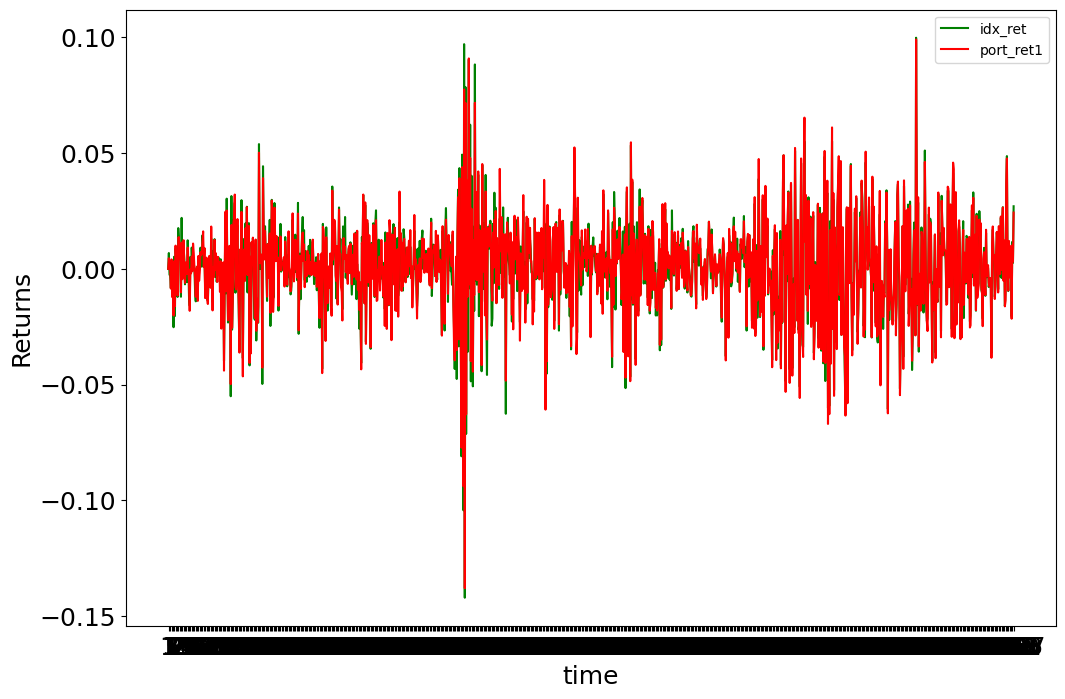

In [55]:
# Plot the returns of the index versus portfolio 1
# Number of time observations is:
numobs = len(NDXT_values)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret1,color='red', label='port_ret1')

plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()

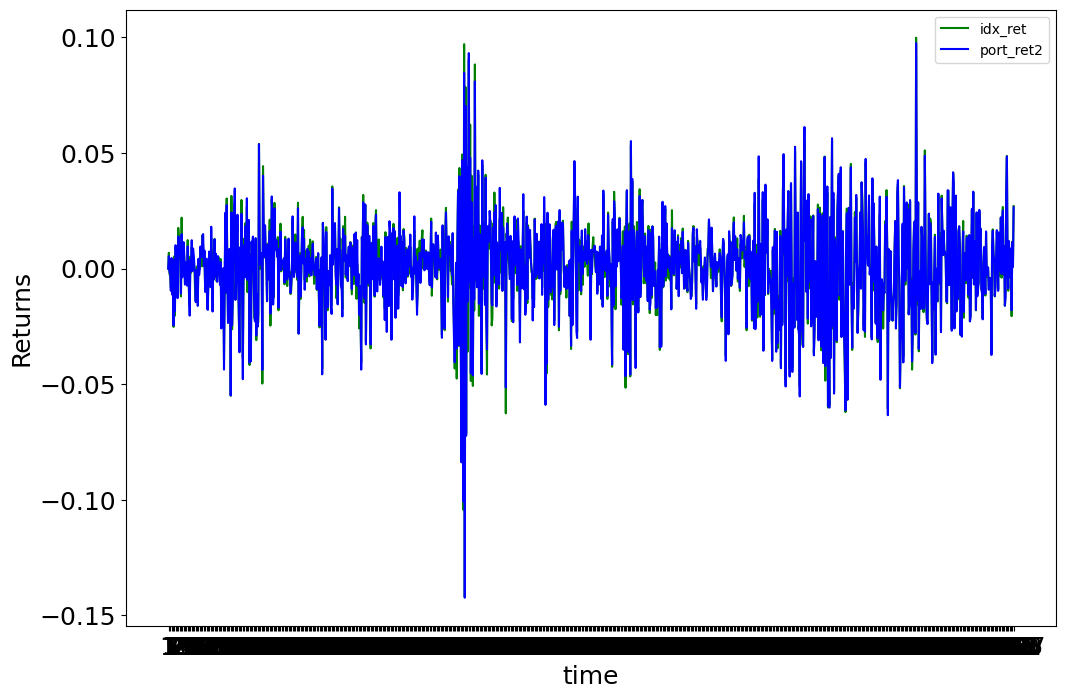

In [56]:
# Plot the returns of the index versus portfolio 2
plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret2,color='blue', label='port_ret2')
plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()